# SURVEY DATA ANALYSIS

    In this analysis to collect different types of data from users. All data collected via google forms and 
    it stored in Excel Format.Here The Excel Sheet(Contact_Information) dataset containing 
    7 columns like “Timestamp”, “Gender”, “Age”,“City”, “State”,“Pincode”,“Product Category”. 
    
    So, we have to analyse data and meaningful insights from it

# Importing All Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
data = pd.read_excel("Contact_Information.xlsx")
data.head()

,Timestamp,Gender,Age,City,State,Pincode,Product Category
0,2021/07/30 1:11:26 PM GMT+5:30,Male,19.0,Erode,Tamil Nadu,667001,Color Fit Pro Smartwatch
1,2021/07/30 1:13:58 PM GMT+5:30,Male,35.0,Chennai,Tamil Nadu,678002,Men's Shoes Sneakers
2,2021/07/30 1:16:27 PM GMT+5:30,Female,26.0,Trichy,Tamil Nadu,664004,pTron Lite Earphones
3,2021/07/30 1:22:41 PM GMT+5:30,Female,27.0,Erode,Tamil Nadu,638003,Men's Shoes Sneakers
4,2021/07/30 1:27:39 PM GMT+5:30,Female,19.0,Madurai,Tamil Nadu,600250,Leather Wallet for Men


In [3]:
data.tail()

,Timestamp,Gender,Age,City,State,Pincode,Product Category
975,2021/07/31 10:14:02 AM GMT+5:30,Female,40.0,Bengalore,Karnataka,560046,Men's Shoes Sneakers
976,2021/07/31 10:44:42 AM GMT+5:30,Female,37.0,Ooty,Tamil Nadu,643001,Color Fit Pro Smartwatch
977,2021/07/31 10:45:13 AM GMT+5:30,Female,46.0,Ooty,Tamil Nadu,643001,Leather Wallet for Men
978,2021/07/31 10:48:12 AM GMT+5:30,Female,53.0,Surat,Gujarat,272023,Men's Shoes Sneakers
979,2021/07/31 10:48:52 AM GMT+5:30,Female,42.0,Surat,Gujarat,272023,Fifty Shades of Grey


# Data Preprocessing Techniques

    Missing values
    Data Cleaning
    Extract Features
    Feature Encodiing
    Label Encoding
    Handle Outliers
    Separate Independent and dependent Features
    then Select best Feature

# Data Exploration

    Data exploration is a key aspect of data analysis and model building. Without spending significant time 
    on understanding the data and its patterns one cannot expect to build efficient predictive models. Data
    exploration takes major chunk of time in a data science project comprising of data cleaning and 
    preprocessing

In [4]:
data.isnull().sum()

Timestamp            0
Gender               0
Age                 19
City                 0
State                0
Pincode              0
Product Category     0
dtype: int64

# Missing values

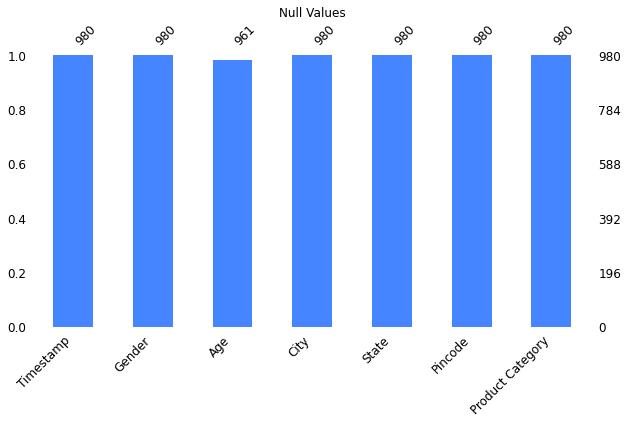

In [5]:
import missingno as no
no.bar(data,figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0))
plt.title("Null Values")
plt.show()

So, In this Dataset have 19 Null Values in Age Column

In [6]:
data["Age"] = data["Age"].fillna(data["Age"].median())

In [7]:
data["Age"].isnull().sum()

0

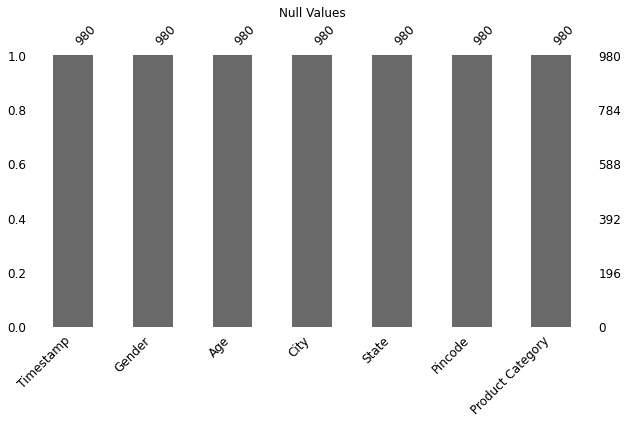

In [8]:
import missingno as no
no.bar(data,figsize=(10,5), fontsize=12)
plt.title("Null Values")
plt.show()

So, The Null values issues are solved using "Median" Function

In [9]:
data.describe()

,Age,Pincode
count,980.000000,980.000000
mean,33.037755,610871.040816
std,9.271944,74568.052653
min,18.000000,252679.000000
25%,26.000000,600250.000000
50%,32.000000,638102.000000
75%,38.000000,638111.000000
max,60.000000,764320.000000


In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,980.0,33.037755,9.271944,18.0,26.0,32.0,38.0,60.0
Pincode,980.0,610871.040816,74568.052653,252679.0,600250.0,638102.0,638111.0,764320.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         980 non-null    object 
 1   Gender            980 non-null    object 
 2   Age               980 non-null    float64
 3   City              980 non-null    object 
 4   State             980 non-null    object 
 5   Pincode           980 non-null    int64  
 6   Product Category  980 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 53.7+ KB


In [12]:
data.shape

(980, 7)

In [13]:
data.columns

Index(['Timestamp', 'Gender', 'Age', 'City', 'State', 'Pincode',
       'Product Category'],
      dtype='object')

In [14]:
data.dtypes

Timestamp            object
Gender               object
Age                 float64
City                 object
State                object
Pincode               int64
Product Category     object
dtype: object

In [15]:
data.keys()

Index(['Timestamp', 'Gender', 'Age', 'City', 'State', 'Pincode',
       'Product Category'],
      dtype='object')

In [16]:
data.ndim

2

In [17]:
data.columns

Index(['Timestamp', 'Gender', 'Age', 'City', 'State', 'Pincode',
       'Product Category'],
      dtype='object')

In [18]:
data.size

6860

In [19]:
data.nunique()

Timestamp           245
Gender                2
Age                  38
City                 48
State                 5
Pincode              66
Product Category      8
dtype: int64

#### From description we can see that Timestamp is a object data type

    Therefore, we have to convert this datatype into timestamp so as to use this column properly for
    prediction,because our model will not be able to understand Theses string values,
    it just understand Time-stamp For this we require pandas to_datetime to convert object data type to
    datetime dtype.

        data.Day method will extract only day of that date
        data.Month method will extract only month of that date
        data.Year method will extract only year of that date

In [20]:
#converting data and time format:
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [21]:
for i in ['Timestamp']:
    change_into_datetime(i)

In [22]:
data.dtypes

Timestamp           datetime64[ns, pytz.FixedOffset(-330)]
Gender                                              object
Age                                                float64
City                                                object
State                                               object
Pincode                                              int64
Product Category                                    object
dtype: object

In [23]:
data.corr()

,Age,Pincode
Age,1.000000,-0.173799
Pincode,-0.173799,1.000000


<AxesSubplot:>

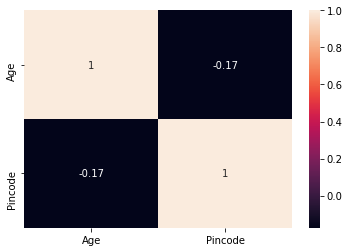

In [24]:
sns.heatmap(data.corr(),annot=True)

In [25]:
# To change the formation of day and month as well
data['Day'] = data["Timestamp"].dt.day

In [26]:
data.corr()

,Age,Pincode,Day
Age,1.000000,-0.173799,0.316218
Pincode,-0.173799,1.000000,-0.372480
Day,0.316218,-0.372480,1.000000


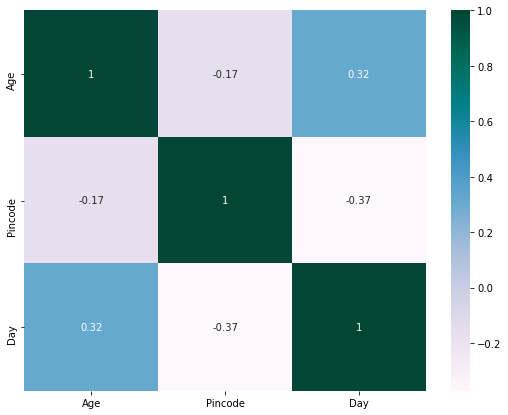

In [27]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(),annot=True,cmap='PuBuGn')
plt.show()

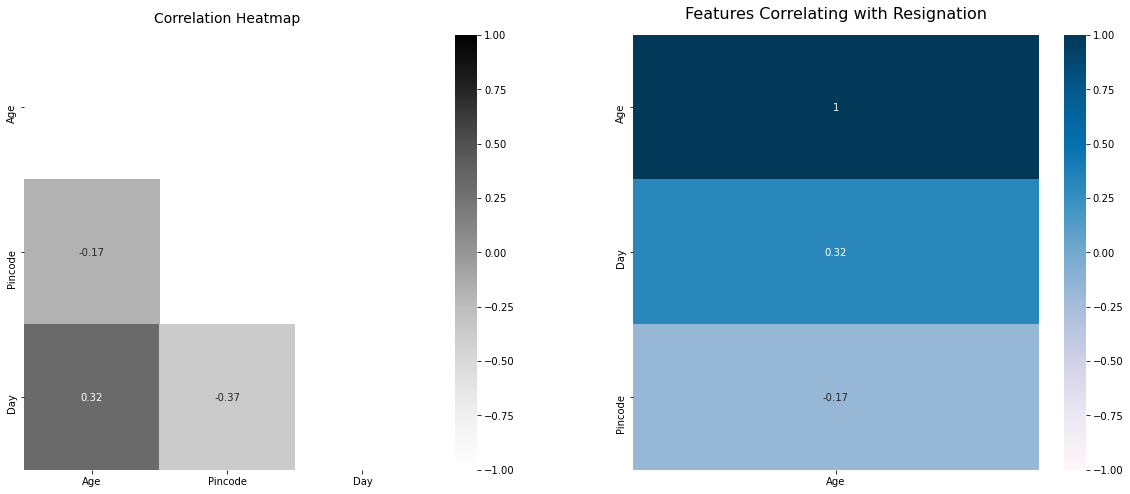

In [28]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
resign_corr = data.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1,annot=True,ax=ax[0],cmap='Greys')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
heatmap = sns.heatmap(resign_corr[['Age']].sort_values(by='Age',ascending=False),vmin=-1, vmax=1, annot=True,ax=ax[1],cmap='PuBu')
heatmap.set_title('Features Correlating with Resignation', fontdict={'fontsize':16}, pad=16);

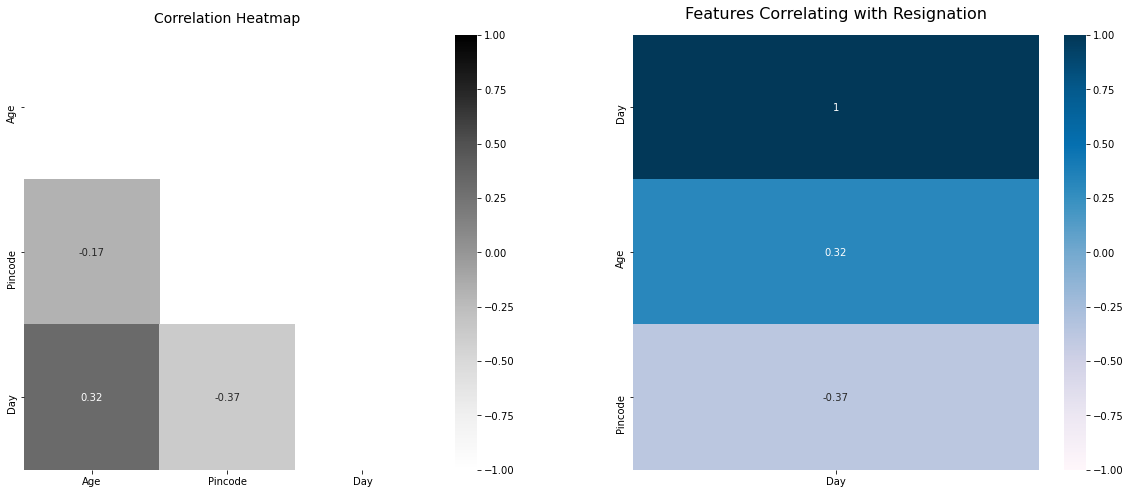

In [29]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
resign_corr = data.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1,annot=True,ax=ax[0],cmap='Greys')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
heatmap = sns.heatmap(resign_corr[['Day']].sort_values(by='Day',ascending=False),vmin=-1, vmax=1, annot=True,ax=ax[1],cmap='PuBu')
heatmap.set_title('Features Correlating with Resignation', fontdict={'fontsize':16}, pad=16);

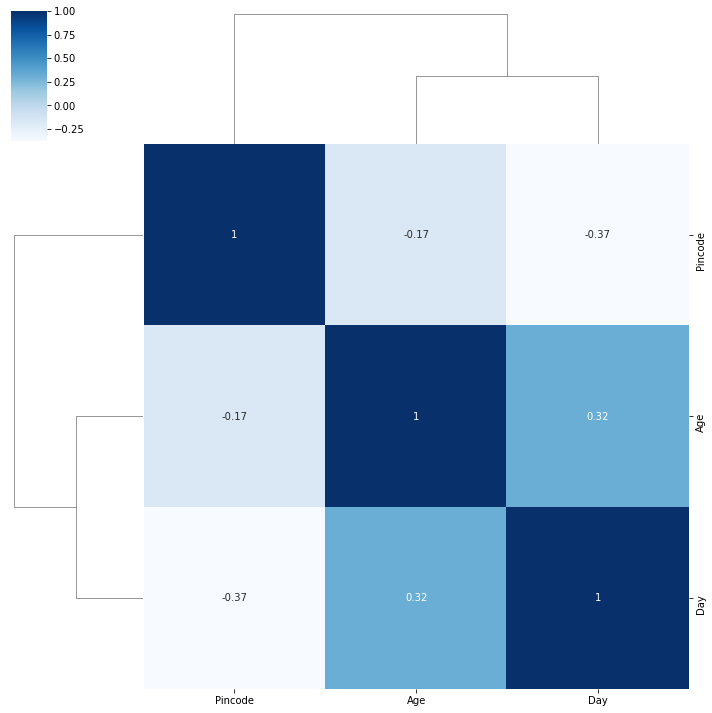

In [30]:
sns.clustermap(data.corr(),annot=True,cmap='Blues')

In [31]:
data['Month'] = data["Timestamp"].dt.month

In [32]:
data['Year'] = data["Timestamp"].dt.year

In [33]:
data['Age'] = data['Age'].astype('int')

In [34]:
data.dtypes

Timestamp           datetime64[ns, pytz.FixedOffset(-330)]
Gender                                              object
Age                                                  int32
City                                                object
State                                               object
Pincode                                              int64
Product Category                                    object
Day                                                  int64
Month                                                int64
Year                                                 int64
dtype: object

In [35]:
data.head()

,Timestamp,Gender,Age,City,State,Pincode,Product Category,Day,Month,Year
0,2021-07-30 13:11:26-05:30,Male,19,Erode,Tamil Nadu,667001,Color Fit Pro Smartwatch,30,7,2021
1,2021-07-30 13:13:58-05:30,Male,35,Chennai,Tamil Nadu,678002,Men's Shoes Sneakers,30,7,2021
2,2021-07-30 13:16:27-05:30,Female,26,Trichy,Tamil Nadu,664004,pTron Lite Earphones,30,7,2021
3,2021-07-30 13:22:41-05:30,Female,27,Erode,Tamil Nadu,638003,Men's Shoes Sneakers,30,7,2021
4,2021-07-30 13:27:39-05:30,Female,19,Madurai,Tamil Nadu,600250,Leather Wallet for Men,30,7,2021


In [36]:
data.shape

(980, 10)

# Extract Derived Features from Data

In [37]:
def extract_hour(df,col):
    df[col+'_hour'] = df[col].dt.hour

In [38]:
def extract_min(df,col):
    df[col+'_minute'] = df[col].dt.minute

In [39]:
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [40]:
extract_hour(data,'Timestamp')

In [41]:
extract_min(data,'Timestamp')

In [42]:
data.head()

,Timestamp,Gender,Age,City,State,Pincode,Product Category,Day,Month,Year,Timestamp_hour,Timestamp_minute
0,2021-07-30 13:11:26-05:30,Male,19,Erode,Tamil Nadu,667001,Color Fit Pro Smartwatch,30,7,2021,13,11
1,2021-07-30 13:13:58-05:30,Male,35,Chennai,Tamil Nadu,678002,Men's Shoes Sneakers,30,7,2021,13,13
2,2021-07-30 13:16:27-05:30,Female,26,Trichy,Tamil Nadu,664004,pTron Lite Earphones,30,7,2021,13,16
3,2021-07-30 13:22:41-05:30,Female,27,Erode,Tamil Nadu,638003,Men's Shoes Sneakers,30,7,2021,13,22
4,2021-07-30 13:27:39-05:30,Female,19,Madurai,Tamil Nadu,600250,Leather Wallet for Men,30,7,2021,13,27


In [43]:
drop_column(data,'Timestamp')

In [44]:
data.head()

,Gender,Age,City,State,Pincode,Product Category,Day,Month,Year,Timestamp_hour,Timestamp_minute
0,Male,19,Erode,Tamil Nadu,667001,Color Fit Pro Smartwatch,30,7,2021,13,11
1,Male,35,Chennai,Tamil Nadu,678002,Men's Shoes Sneakers,30,7,2021,13,13
2,Female,26,Trichy,Tamil Nadu,664004,pTron Lite Earphones,30,7,2021,13,16
3,Female,27,Erode,Tamil Nadu,638003,Men's Shoes Sneakers,30,7,2021,13,22
4,Female,19,Madurai,Tamil Nadu,600250,Leather Wallet for Men,30,7,2021,13,27


# Data Visualization

    Data visualization is the graphical representation of data in order to explore and visualize data to
    uncover insights from the start or identify areas or patterns to dig into more. Using interactive
    dashboards and point-and-click data exploration, users can better understand the bigger picture 
    and get to insights faster.

C:\Users\elcot\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

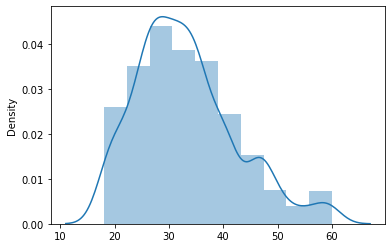

In [45]:
sns.distplot(x = data['Age'], bins = 10)

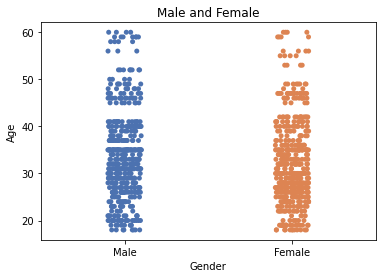

In [46]:
sns.stripplot(data=data, y='Age',x='Gender', palette='deep')
plt.title("Male and Female")
plt.show()

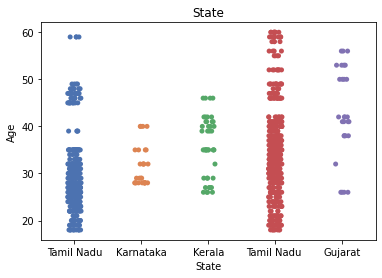

In [47]:
sns.stripplot(data=data, y='Age',x='State', palette='deep')
plt.title("State")
plt.show()

In [48]:
data['Gender'].value_counts()

Female    508
Male      472
Name: Gender, dtype: int64

In [49]:
explode = (0, 0.1)

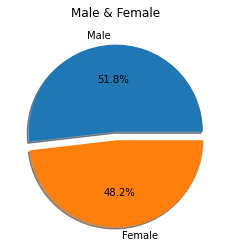

In [50]:
plt.pie(x=data['Gender'].value_counts(),labels=['Male','Female'],explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Male & Female')
plt.show()

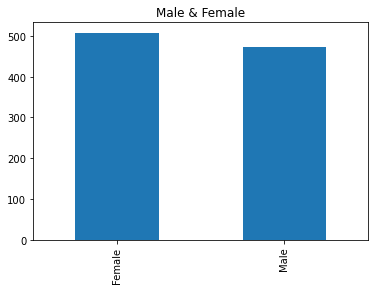

In [51]:
x=data['Gender'].value_counts()
x.plot.bar()
plt.title('Male & Female')
plt.show()

In [52]:
data['Product Category'].nunique()

8

In [53]:
label = data['Product Category'].unique()

In [54]:
label

array(['Color Fit Pro Smartwatch', "Men's Shoes Sneakers",
       'pTron Lite Earphones', 'Leather Wallet for Men',
       'Fire Boltt Headphones', 'Fifty Shades of Grey',
       'Amazon Prime Subscription', 'Fogg Perfume for Men'], dtype=object)

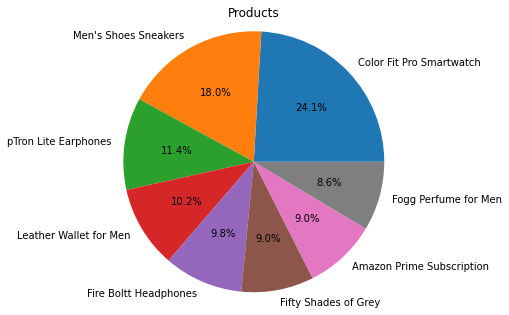

In [55]:
plt.pie(x=data['Product Category'].value_counts(),labels = label,rotatelabels=False,autopct='%1.1f%%',radius=1.5)
plt.title('Products\n\n')
plt.show()

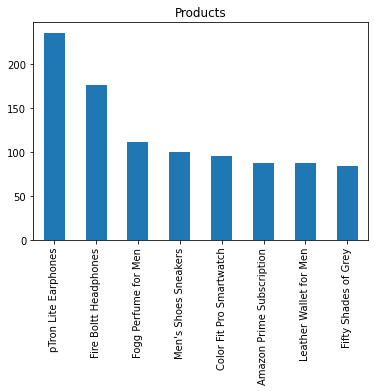

In [56]:
x=data['Product Category'].value_counts()
x.plot.bar()
plt.title('Products')
plt.show()

In [57]:
data['City'].value_counts()

Erode                312
Chennai               72
Tirupur               48
Karur                 40
Salem                 40
Coimbatore            40
Namakkal              36
Tenkasi               36
Surat                 28
Madurai               24
Pollachi              20
Gobichettipalayam     20
Trichy                16
Kozhikode             16
Thanjavur             16
Calicut               16
Tiruppur              16
Vellakovil            16
Ooty                  12
Tirunelveli           12
Udupi                 12
Thirupur               8
Koyilandy              8
Mangalore              8
Palakadd               8
Thiruchengode          8
Nagapattinam           8
Kanyakumari            4
Nilgiris               4
Dharmapuri             4
Madhurai               4
Coimbatore             4
Vellakovil             4
Selam                  4
Sivagangai             4
Madurai                4
Theni                  4
Chennai                4
Pallipalayam           4
Kangayam               4


In [58]:
label = data['City'].unique()

In [59]:
label

array(['Erode', 'Chennai', 'Trichy', 'Madurai', 'Coimbatore', 'Tiruppur',
       'Namakkal', 'Thirupur', 'Vellakovil', 'Karur', 'Tirupur',
       'Tenkasi', 'Vellakovil ', 'Mettur', 'Salem', 'Karur ', 'Thirupur ',
       'Mysore', 'Calicut', 'Udupi', 'Mangalore', 'Ooty', 'Surat',
       'Sivaganga', 'Nagapattinam', 'Thiruchengode', 'Pallipalayam',
       'Kangayam', 'Koyilandy', 'Kozhikode', 'Selam', 'Theni',
       'Coimbatore ', 'Dharmapuri ', 'Chennai ', 'Tirunelveli',
       'Madurai ', 'Pollachi', 'Kavindapadi', 'Madhurai', 'Thenkasi',
       'Kanyakumari', 'Sivagangai', 'Thanjavur', 'Palakadd', 'Nilgiris',
       'Gobichettipalayam', 'Bengalore'], dtype=object)

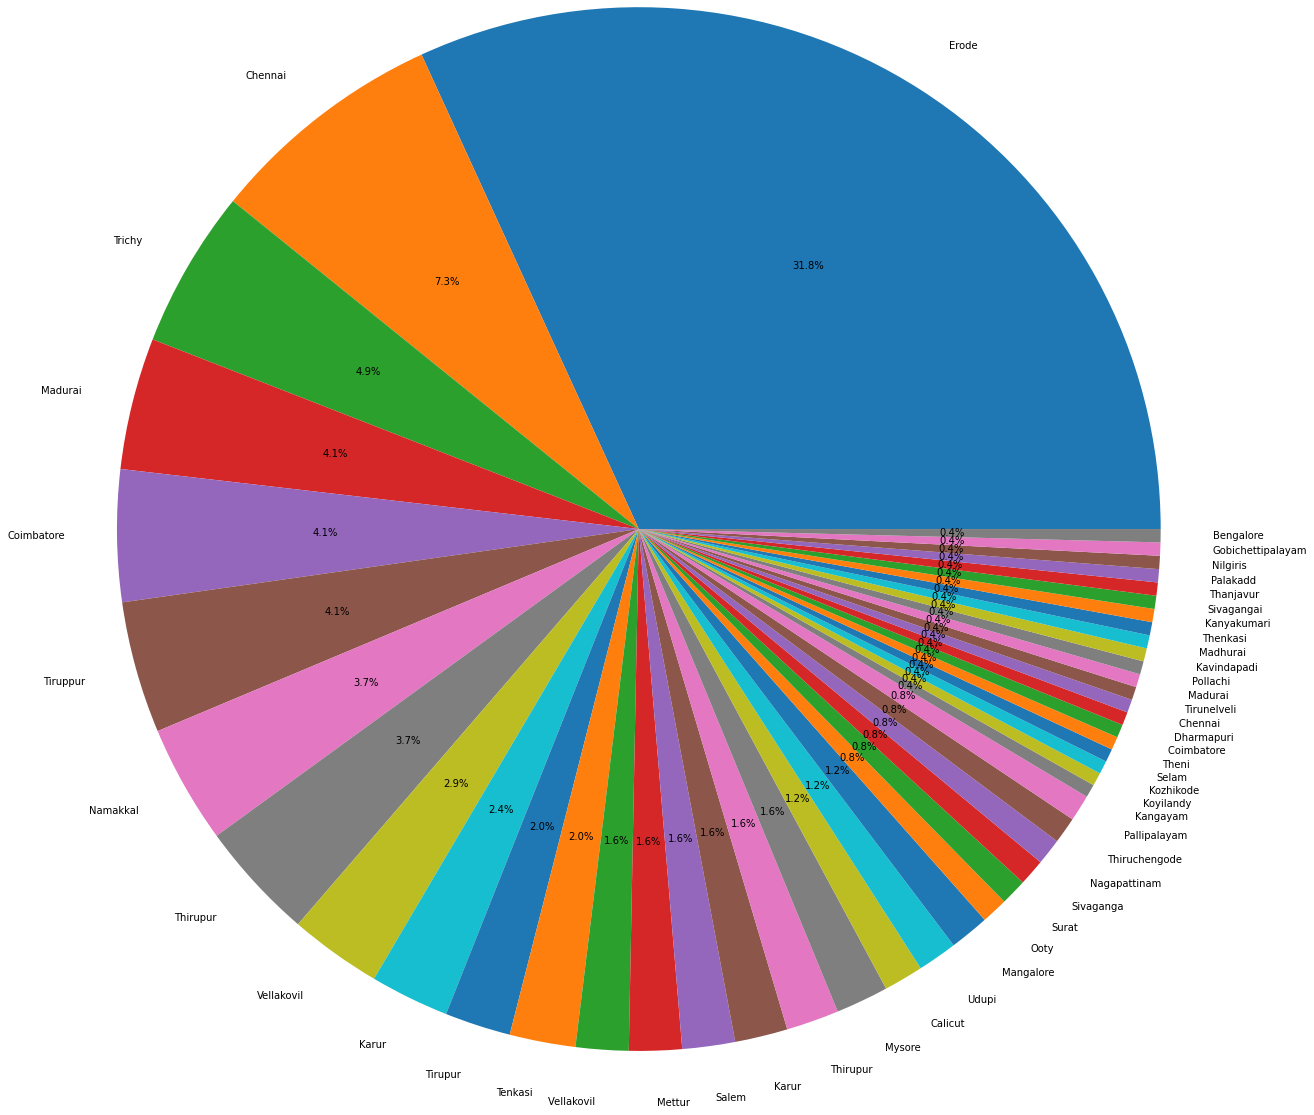

In [60]:
plt.pie(x=data['City'].value_counts(),labels = label,rotatelabels=False,autopct='%1.1f%%',radius=6)
plt.show()

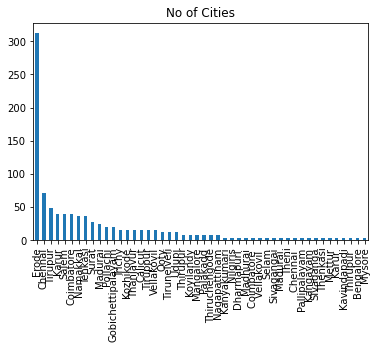

In [61]:
x=data['City'].value_counts()
x.plot.bar()
plt.title('No of Cities')
plt.show()

In [62]:
data['State'].value_counts()

Tamil Nadu     508
Tamil Nadu     372
Kerala          44
Gujarat         28
Karnataka       28
Name: State, dtype: int64

In [63]:
label = data['State'].unique()

In [64]:
label

array(['Tamil Nadu', 'Karnataka', 'Kerala', 'Tamil Nadu ', 'Gujarat'],
      dtype=object)

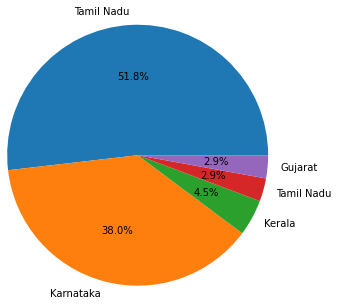

In [65]:
plt.pie(x=data['State'].value_counts(),labels = label,rotatelabels=False,autopct='%1.1f%%',radius=1.5)
plt.show()

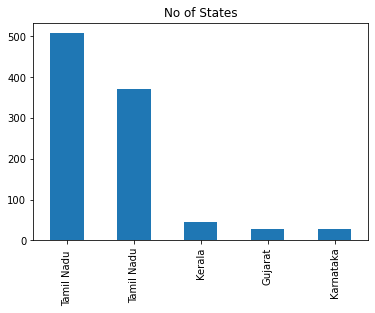

In [66]:
x=data['State'].value_counts()
x.plot.bar()
plt.title('No of States')
plt.show()

# LabelEncoder

    There is sequenced process or there is a sequenced relationship. it "encode" target labels with value between 0 and n_classes-1. This transformer should be used to encode target values

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
Label_encoder = LabelEncoder()

In [69]:
data.State = Label_encoder.fit_transform(data.State)

In [70]:
data.State.unique()

array([3, 1, 2, 4, 0])

In [71]:
data.head(10)

,Gender,Age,City,State,Pincode,Product Category,Day,Month,Year,Timestamp_hour,Timestamp_minute
0,Male,19,Erode,3,667001,Color Fit Pro Smartwatch,30,7,2021,13,11
1,Male,35,Chennai,3,678002,Men's Shoes Sneakers,30,7,2021,13,13
2,Female,26,Trichy,3,664004,pTron Lite Earphones,30,7,2021,13,16
3,Female,27,Erode,3,638003,Men's Shoes Sneakers,30,7,2021,13,22
4,Female,19,Madurai,3,600250,Leather Wallet for Men,30,7,2021,13,27
5,Female,27,Erode,3,600250,Leather Wallet for Men,30,7,2021,13,27
6,Male,27,Coimbatore,3,600234,pTron Lite Earphones,30,7,2021,13,28
7,Female,32,Erode,3,638102,Fire Boltt Headphones,30,7,2021,13,30
8,Female,25,Madurai,3,600250,Fifty Shades of Grey,30,7,2021,13,30
9,Female,35,Erode,3,638002,Leather Wallet for Men,30,7,2021,13,30


# Categorical values:

In [72]:
cat_col = [col for col in data.columns if data[col].dtype=='O']

In [73]:
cat_col

['Gender', 'City', 'Product Category']

In [74]:
continues_col = [col for col in data.columns if data[col].dtype!='O']

In [75]:
continues_col

['Age',
 'State',
 'Pincode',
 'Day',
 'Month',
 'Year',
 'Timestamp_hour',
 'Timestamp_minute']

# Handle Categorical Data & Feature Encoding

In [76]:
categorical = data[cat_col]

In [77]:
categorical.head()

,Gender,City,Product Category
0,Male,Erode,Color Fit Pro Smartwatch
1,Male,Chennai,Men's Shoes Sneakers
2,Female,Trichy,pTron Lite Earphones
3,Female,Erode,Men's Shoes Sneakers
4,Female,Madurai,Leather Wallet for Men


In [78]:
categorical["Gender"].value_counts()

Female    508
Male      472
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Age'>

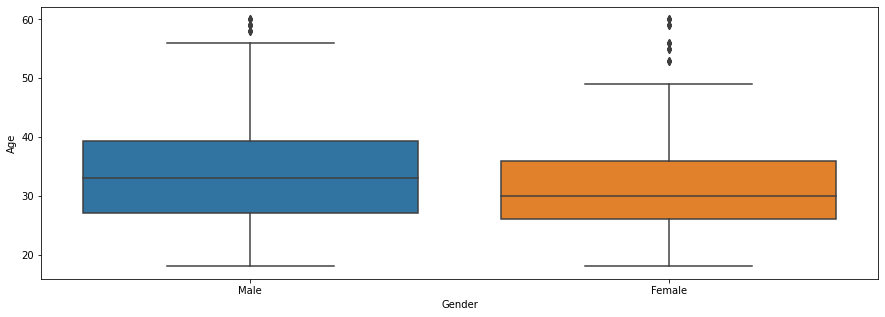

In [79]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Gender',y='Age',data=data)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

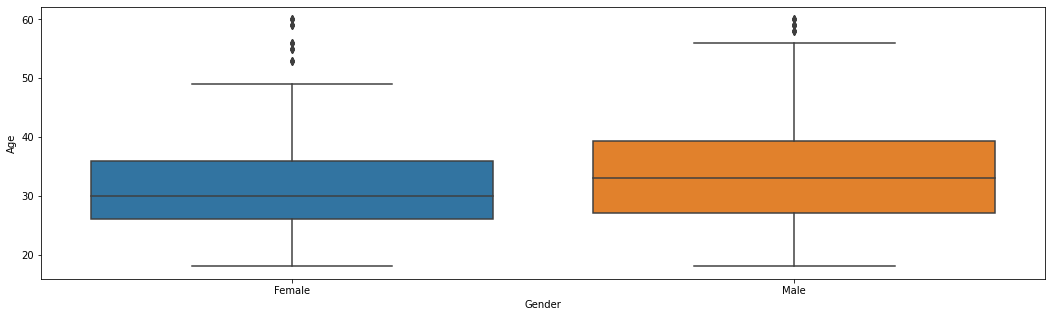

In [80]:
plt.figure(figsize=(18,5))
sns.boxplot(x='Gender',y='Age',data=data.sort_values('Age',ascending=False))

<AxesSubplot:xlabel='City', ylabel='Age'>

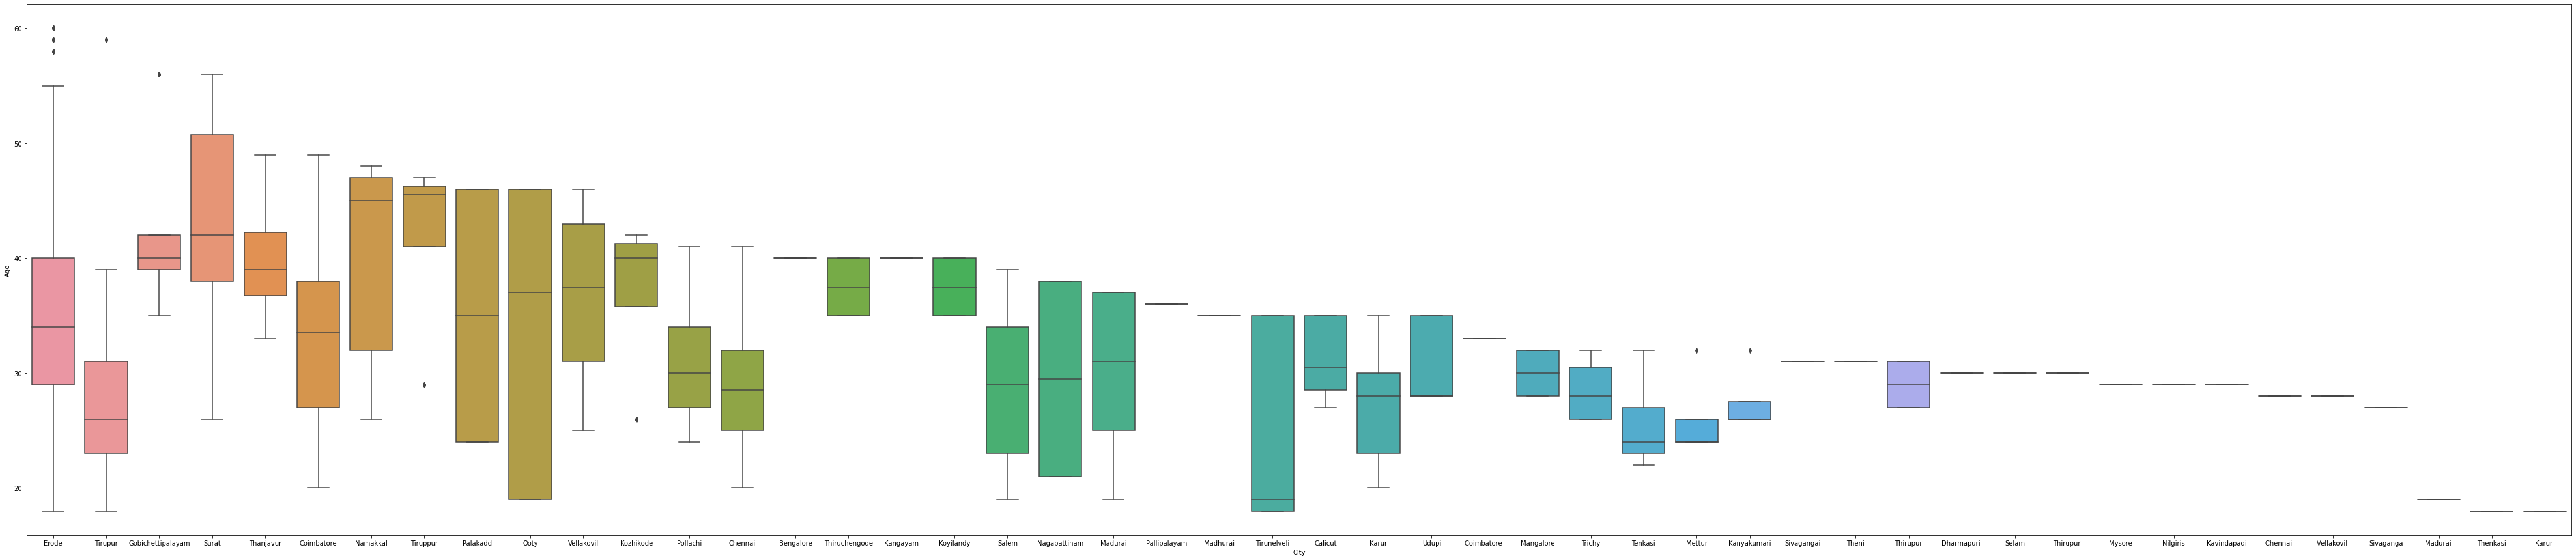

In [81]:
plt.figure(figsize=(70,15))
sns.boxplot(x='City',y='Age',data=data.sort_values('Age',ascending=False))

In [82]:
from sklearn.preprocessing import LabelEncoder
Label_encoder = LabelEncoder()
categorical["Gender"] = Label_encoder.fit_transform(categorical.Gender)

<ipython-input-82-21e4ca42e322>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical["Gender"] = Label_encoder.fit_transform(categorical.Gender)


In [83]:
categorical["Gender"].head()

0    1
1    1
2    0
3    0
4    0
Name: Gender, dtype: int32

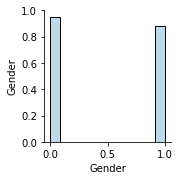

In [84]:
sns.set_palette("Paired")
sns.pairplot(categorical)
plt.show()

# Get dummies:

    There is no sequenced process or there is a no sequenced relationship that indicates whether a separate 
    categorical variable takes on a specific value. We can create dummy variables in python using 
    get_dummies() method

In [85]:
City_Encode = pd.get_dummies(categorical["City"])

In [86]:
City_Encode

,Bengalore,Calicut,Chennai,Chennai,Coimbatore,Coimbatore,Dharmapuri,Erode,Gobichettipalayam,Kangayam,...,Thiruchengode,Thirupur,Thirupur,Tirunelveli,Tiruppur,Tirupur,Trichy,Udupi,Vellakovil,Vellakovil
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


drop_first=n-1 formulation 

In [87]:
City_Encode = pd.get_dummies(categorical["City"],drop_first=True) #drop_first=n-1 formulation 
City_Encode

,Calicut,Chennai,Chennai,Coimbatore,Coimbatore,Dharmapuri,Erode,Gobichettipalayam,Kangayam,Kanyakumari,...,Thiruchengode,Thirupur,Thirupur,Tirunelveli,Tiruppur,Tirupur,Trichy,Udupi,Vellakovil,Vellakovil
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Product Category', ylabel='Age'>

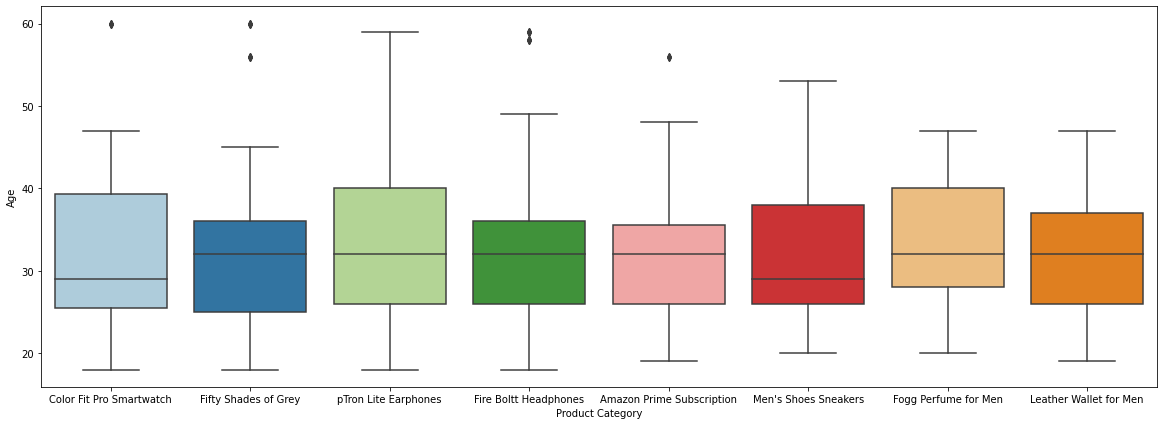

In [88]:
plt.figure(figsize=(20,7))
sns.boxplot(x='Product Category',y='Age',data=data.sort_values('Age',ascending=False))

In [89]:
Product_Category = pd.get_dummies(categorical["Product Category"],drop_first=True) #drop_first=n-1 formulation so automatically bangalore is removed
Product_Category.head()

,Color Fit Pro Smartwatch,Fifty Shades of Grey,Fire Boltt Headphones,Fogg Perfume for Men,Leather Wallet for Men,Men's Shoes Sneakers,pTron Lite Earphones
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0


In [90]:
categorical.head()

,Gender,City,Product Category
0,1,Erode,Color Fit Pro Smartwatch
1,1,Chennai,Men's Shoes Sneakers
2,0,Trichy,pTron Lite Earphones
3,0,Erode,Men's Shoes Sneakers
4,0,Madurai,Leather Wallet for Men


In [91]:
categorical.isnull().sum()

Gender              0
City                0
Product Category    0
dtype: int64

In [92]:
data_train = pd.concat([categorical,City_Encode,Product_Category,data[continues_col]],axis=1)
data_train.head()

,Gender,City,Product Category,Calicut,Chennai,Chennai,Coimbatore,Coimbatore,Dharmapuri,Erode,...,Men's Shoes Sneakers,pTron Lite Earphones,Age,State,Pincode,Day,Month,Year,Timestamp_hour,Timestamp_minute
0,1,Erode,Color Fit Pro Smartwatch,0,0,0,0,0,0,1,...,0,0,19,3,667001,30,7,2021,13,11
1,1,Chennai,Men's Shoes Sneakers,0,1,0,0,0,0,0,...,1,0,35,3,678002,30,7,2021,13,13
2,0,Trichy,pTron Lite Earphones,0,0,0,0,0,0,0,...,0,1,26,3,664004,30,7,2021,13,16
3,0,Erode,Men's Shoes Sneakers,0,0,0,0,0,0,1,...,1,0,27,3,638003,30,7,2021,13,22
4,0,Madurai,Leather Wallet for Men,0,0,0,0,0,0,0,...,0,0,19,3,600250,30,7,2021,13,27


In [93]:
del data_train['Pincode']

In [94]:
data_train.head()

,Gender,City,Product Category,Calicut,Chennai,Chennai,Coimbatore,Coimbatore,Dharmapuri,Erode,...,Leather Wallet for Men,Men's Shoes Sneakers,pTron Lite Earphones,Age,State,Day,Month,Year,Timestamp_hour,Timestamp_minute
0,1,Erode,Color Fit Pro Smartwatch,0,0,0,0,0,0,1,...,0,0,0,19,3,30,7,2021,13,11
1,1,Chennai,Men's Shoes Sneakers,0,1,0,0,0,0,0,...,0,1,0,35,3,30,7,2021,13,13
2,0,Trichy,pTron Lite Earphones,0,0,0,0,0,0,0,...,0,0,1,26,3,30,7,2021,13,16
3,0,Erode,Men's Shoes Sneakers,0,0,0,0,0,0,1,...,0,1,0,27,3,30,7,2021,13,22
4,0,Madurai,Leather Wallet for Men,0,0,0,0,0,0,0,...,1,0,0,19,3,30,7,2021,13,27


In [95]:
pd.set_option('display.max_columns',35)
data_train.head()

,Gender,City,Product Category,Calicut,Chennai,Chennai,Coimbatore,Coimbatore,Dharmapuri,Erode,Gobichettipalayam,Kangayam,Kanyakumari,Karur,Karur,Kavindapadi,Koyilandy,...,Udupi,Vellakovil,Vellakovil,Color Fit Pro Smartwatch,Fifty Shades of Grey,Fire Boltt Headphones,Fogg Perfume for Men,Leather Wallet for Men,Men's Shoes Sneakers,pTron Lite Earphones,Age,State,Day,Month,Year,Timestamp_hour,Timestamp_minute
0,1,Erode,Color Fit Pro Smartwatch,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,19,3,30,7,2021,13,11
1,1,Chennai,Men's Shoes Sneakers,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,35,3,30,7,2021,13,13
2,0,Trichy,pTron Lite Earphones,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,26,3,30,7,2021,13,16
3,0,Erode,Men's Shoes Sneakers,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,27,3,30,7,2021,13,22
4,0,Madurai,Leather Wallet for Men,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,19,3,30,7,2021,13,27


In [96]:
drop_column(data_train,'Product Category')

In [97]:
drop_column(data_train,'City')

In [98]:
data_train.head()

,Gender,Calicut,Chennai,Chennai,Coimbatore,Coimbatore,Dharmapuri,Erode,Gobichettipalayam,Kangayam,Kanyakumari,Karur,Karur,Kavindapadi,Koyilandy,Kozhikode,Madhurai,...,Udupi,Vellakovil,Vellakovil,Color Fit Pro Smartwatch,Fifty Shades of Grey,Fire Boltt Headphones,Fogg Perfume for Men,Leather Wallet for Men,Men's Shoes Sneakers,pTron Lite Earphones,Age,State,Day,Month,Year,Timestamp_hour,Timestamp_minute
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,19,3,30,7,2021,13,11
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,35,3,30,7,2021,13,13
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,26,3,30,7,2021,13,16
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,27,3,30,7,2021,13,22
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,19,3,30,7,2021,13,27


In [99]:
del data_train['Month']

In [100]:
del data_train['Year']

In [101]:
data_train.corr()

,Gender,Calicut,Chennai,Chennai,Coimbatore,Coimbatore,Dharmapuri,Erode,Gobichettipalayam,Kangayam,Kanyakumari,Karur,Karur,Kavindapadi,Koyilandy,Kozhikode,Madhurai,...,Tirupur,Trichy,Udupi,Vellakovil,Vellakovil,Color Fit Pro Smartwatch,Fifty Shades of Grey,Fire Boltt Headphones,Fogg Perfume for Men,Leather Wallet for Men,Men's Shoes Sneakers,pTron Lite Earphones,Age,State,Day,Timestamp_hour,Timestamp_minute
Gender,1.000000,-0.059723,-0.020958,-0.061708,-0.033702,-0.061708,-0.061708,0.270619,0.034193,0.066415,0.066415,0.048868,0.066415,0.066415,0.003335,-0.124183,-0.061708,...,-0.067356,-0.059723,-0.033046,-0.059723,0.066415,-0.097807,-0.061695,0.081043,-0.063821,-0.074174,0.025885,0.144884,0.094577,0.179718,-0.020958,0.310628,-0.029815
Calicut,-0.059723,1.000000,-0.036278,-0.008248,-0.026576,-0.008248,-0.008248,-0.088046,-0.018595,-0.008248,-0.008248,-0.026576,-0.008248,-0.008248,-0.011688,-0.016598,-0.008248,...,-0.029237,-0.016598,-0.014344,-0.016598,-0.008248,-0.042455,0.075606,0.023631,-0.046278,-0.040465,-0.043429,0.002767,-0.023984,-0.188688,-0.036278,-0.051263,-0.088950
Chennai,-0.020958,-0.036278,1.000000,-0.018027,-0.058088,-0.018027,-0.018027,-0.192448,-0.040645,-0.018027,-0.018027,-0.058088,-0.018027,-0.018027,-0.025547,-0.036278,-0.018027,...,-0.063905,-0.036278,-0.031353,-0.036278,-0.018027,-0.040169,-0.086220,0.031274,-0.051981,-0.033726,0.111801,-0.085421,-0.137462,-0.050815,-0.079295,-0.123558,-0.017166
Chennai,-0.061708,-0.008248,-0.018027,1.000000,-0.013206,-0.004098,-0.004098,-0.043752,-0.009240,-0.004098,-0.004098,-0.013206,-0.004098,-0.004098,-0.005808,-0.008248,-0.004098,...,-0.014528,-0.008248,-0.007128,-0.008248,-0.004098,-0.021097,-0.019602,-0.029953,-0.022996,-0.020108,0.189909,-0.036056,-0.034801,0.047169,-0.018027,0.021628,-0.074276
Coimbatore,-0.033702,-0.026576,-0.058088,-0.013206,1.000000,-0.013206,-0.013206,-0.140979,-0.029775,-0.013206,-0.013206,-0.042553,-0.013206,-0.013206,-0.018714,-0.026576,-0.013206,...,-0.046814,-0.026576,-0.022968,-0.026576,-0.013206,0.070812,0.010527,-0.096515,-0.009262,0.007363,0.134905,-0.019692,0.016967,-0.029657,-0.058088,-0.127614,0.122089
Coimbatore,-0.061708,-0.008248,-0.018027,-0.004098,-0.013206,1.000000,-0.004098,-0.043752,-0.009240,-0.004098,-0.004098,-0.013206,-0.004098,-0.004098,-0.005808,-0.008248,-0.004098,...,-0.014528,-0.008248,-0.007128,-0.008248,-0.004098,-0.021097,-0.019602,-0.029953,0.178220,-0.020108,-0.021581,-0.036056,-0.000261,0.047169,-0.018027,0.021628,-0.081353
Dharmapuri,-0.061708,-0.008248,-0.018027,-0.004098,-0.013206,-0.004098,1.000000,-0.043752,-0.009240,-0.004098,-0.004098,-0.013206,-0.004098,-0.004098,-0.005808,-0.008248,-0.004098,...,-0.014528,-0.008248,-0.007128,-0.008248,-0.004098,-0.021097,-0.019602,-0.029953,-0.022996,-0.020108,-0.021581,0.113667,-0.020985,0.047169,-0.018027,0.021628,-0.077815
Erode,0.270619,-0.088046,-0.192448,-0.043752,-0.140979,-0.043752,-0.043752,1.000000,-0.098643,-0.043752,-0.043752,-0.140979,-0.043752,-0.043752,-0.062001,-0.088046,-0.043752,...,-0.155096,-0.088046,-0.076093,-0.088046,-0.043752,-0.107314,-0.115358,0.205251,-0.135336,-0.030773,-0.056709,0.188858,0.180163,0.397458,-0.192448,0.646689,-0.002597
Gobichettipalayam,0.034193,-0.018595,-0.040645,-0.009240,-0.029775,-0.009240,-0.009240,-0.098643,1.000000,-0.009240,-0.009240,-0.029775,-0.009240,-0.009240,-0.013095,-0.018595,-0.009240,...,-0.032756,-0.018595,-0.016071,-0.018595,-0.009240,0.049547,0.058926,0.007674,-0.051848,0.055639,-0.048656,-0.081292,0.145818,0.106348,0.512573,-0.269825,-0.181825
Kangayam,0.066415,-0.008248,-0.018027,-0.004098,-0.013206,-0.004098,-0.004098,-0.043752,-0.009240,1.000000,-0.004098,-0.013206,-0.004098,-0.004098,-0.005808,-0.008248,-0.004098,...,-0.014528,-0.008248,-0.007128,-0.008248,-0.004098,-0.021097,-0.019602,-0.029953,-0.022996,-0.020108,0.189909,-0.036056,0.048096,0.047169,-0.018027,-0.001923,-0.045970


# Handle Outliers

# Outlier detection and Outlier imputation if availabale in data

In [102]:
def plot(df,col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

C:\Users\elcot\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\elcot\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


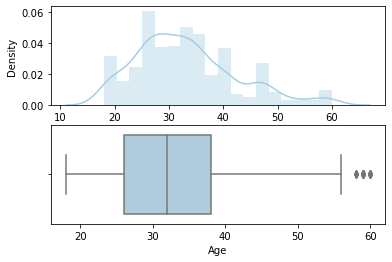

In [103]:
plot(data_train,'Age')

# Separate out your Independent feature & Dependent feature

In [104]:
data_train.shape

(980, 60)

In [105]:
X = data_train.drop('Gender',axis=1)
# Independent variables
X.head()

,Calicut,Chennai,Chennai,Coimbatore,Coimbatore,Dharmapuri,Erode,Gobichettipalayam,Kangayam,Kanyakumari,Karur,Karur,Kavindapadi,Koyilandy,Kozhikode,Madhurai,Madurai,...,Tirupur,Trichy,Udupi,Vellakovil,Vellakovil,Color Fit Pro Smartwatch,Fifty Shades of Grey,Fire Boltt Headphones,Fogg Perfume for Men,Leather Wallet for Men,Men's Shoes Sneakers,pTron Lite Earphones,Age,State,Day,Timestamp_hour,Timestamp_minute
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,19,3,30,13,11
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,35,3,30,13,13
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,26,3,30,13,16
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,27,3,30,13,22
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,19,3,30,13,27


In [106]:
X.shape

(980, 59)

In [107]:
# Dependent variables
Y=data_train['Gender']
Y

0      1
1      1
2      0
3      0
4      0
      ..
975    0
976    0
977    0
978    0
979    0
Name: Gender, Length: 980, dtype: int32

# Select best Features using Feature Selection Technique

In [108]:
from sklearn.feature_selection import mutual_info_classif

In [109]:
mutual_info_classif(X,Y) #Independent variable and dependent variable

# Some kind of important and priority with respective your target variable

array([0.        , 0.        , 0.        , 0.00890795, 0.        ,
       0.        , 0.04283181, 0.02148391, 0.00784808, 0.00082224,
       0.00526588, 0.00552584, 0.02911955, 0.01937273, 0.01088995,
       0.00227656, 0.        , 0.        , 0.        , 0.03895135,
       0.        , 0.00608031, 0.        , 0.        , 0.00622567,
       0.        , 0.00016772, 0.03436857, 0.        , 0.        ,
       0.        , 0.        , 0.02468589, 0.02383249, 0.        ,
       0.        , 0.00522593, 0.01669954, 0.00830333, 0.01375227,
       0.00208069, 0.0079168 , 0.01524567, 0.01062805, 0.01229609,
       0.        , 0.00185815, 0.        , 0.        , 0.00431351,
       0.02830902, 0.04030481, 0.        , 0.        , 0.04951721,
       0.04290091, 0.00376168, 0.12252229, 0.13407994])

In [110]:
imp = pd.DataFrame(mutual_info_classif(X,Y),index=X.columns)

In [111]:
imp

,0
Calicut,0.000000
Chennai,0.000000
Chennai,0.000000
Coimbatore,0.000000
Coimbatore,0.002131
Dharmapuri,0.000000
Erode,0.024995
Gobichettipalayam,0.011947
Kangayam,0.000000
Kanyakumari,0.002044


In [112]:
imp.columns=['ímportance']
imp.sort_values('ímportance',ascending=True)

,ímportance
Calicut,0.000000
Nilgiris,0.000000
Palakadd,0.000000
Pallipalayam,0.000000
Salem,0.000000
Sivagangai,0.000000
Surat,0.000000
Thenkasi,0.000000
Thiruchengode,0.000000
Tiruppur,0.000000


In [113]:
imp.columns=['ímportance']
imp.sort_values('ímportance',ascending=False)

,ímportance
Timestamp_minute,0.157496
Timestamp_hour,0.118119
Age,0.072264
Tenkasi,0.059484
State,0.050351
Trichy,0.039312
Karur,0.034393
Color Fit Pro Smartwatch,0.033360
Madhurai,0.031957
Mettur,0.028938


# Splitting Dataset into Training and Testing set

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=5)

In [115]:
X_train.shape

(686, 59)

In [116]:
X_train

,Calicut,Chennai,Chennai,Coimbatore,Coimbatore,Dharmapuri,Erode,Gobichettipalayam,Kangayam,Kanyakumari,Karur,Karur,Kavindapadi,Koyilandy,Kozhikode,Madhurai,Madurai,...,Tirupur,Trichy,Udupi,Vellakovil,Vellakovil,Color Fit Pro Smartwatch,Fifty Shades of Grey,Fire Boltt Headphones,Fogg Perfume for Men,Leather Wallet for Men,Men's Shoes Sneakers,pTron Lite Earphones,Age,State,Day,Timestamp_hour,Timestamp_minute
143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,30,4,30,16,7
689,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,39,2,30,15,20
261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,27,3,30,13,54
682,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,38,4,30,15,8
184,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,33,4,30,17,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,24,3,30,13,57
118,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,40,4,30,15,12
701,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,19,4,30,16,5
206,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,55,4,30,20,14


In [117]:
X_test.shape

(294, 59)

In [118]:
X_test

,Calicut,Chennai,Chennai,Coimbatore,Coimbatore,Dharmapuri,Erode,Gobichettipalayam,Kangayam,Kanyakumari,Karur,Karur,Kavindapadi,Koyilandy,Kozhikode,Madhurai,Madurai,...,Tirupur,Trichy,Udupi,Vellakovil,Vellakovil,Color Fit Pro Smartwatch,Fifty Shades of Grey,Fire Boltt Headphones,Fogg Perfume for Men,Leather Wallet for Men,Men's Shoes Sneakers,pTron Lite Earphones,Age,State,Day,Timestamp_hour,Timestamp_minute
582,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,47,4,30,20,13
208,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,40,4,30,20,15
554,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,26,4,30,17,32
540,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,31,4,30,17,25
477,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,40,4,30,20,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,24,3,30,13,59
149,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,20,4,30,17,24
634,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,27,3,30,13,52
847,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,39,4,31,10,3


In [119]:
Y_train.shape

(686,)

In [120]:
Y_train

143    1
689    0
261    1
682    0
184    1
      ..
400    0
118    1
701    0
206    0
867    0
Name: Gender, Length: 686, dtype: int32

In [121]:
Y_test.shape

(294,)

In [122]:
Y_test

582    1
208    0
554    1
540    1
477    0
      ..
66     1
149    0
634    0
847    1
844    1
Name: Gender, Length: 294, dtype: int32

# Logistic Regression

    Relatonship between one dependent variable and one or more independent variables, but the outcome or prediction should be binary format or categorical format

In [123]:
import scikitplot as skplt

In [124]:
from sklearn.linear_model import LogisticRegression
model  = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\elcot\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [125]:
y_pred_log = model.predict(X_test)

In [126]:
y_pred_log

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1])

In [127]:
df1 = pd.DataFrame({"Actual":Y_test,"Predicted":y_pred_log})
df1

,Actual,Predicted
582,1,1
208,0,1
554,1,1
540,1,1
477,0,1
...,...,...
66,1,0
149,0,1
634,0,0
847,1,0


In [130]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(Y_test, y_pred_log)

array([[102,  39],
       [ 52, 101]], dtype=int64)

              precision    recall  f1-score   support

           0       0.66      0.72      0.69       141
           1       0.72      0.66      0.69       153

    accuracy                           0.69       294
   macro avg       0.69      0.69      0.69       294
weighted avg       0.69      0.69      0.69       294



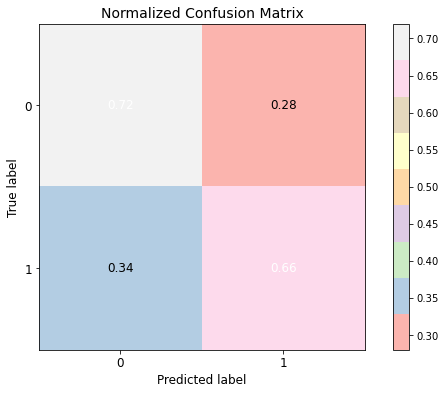

In [131]:
skplt.metrics.plot_confusion_matrix(Y_test,y_pred_log,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(Y_test, y_pred_log))

In [132]:
y_probas_log = model.predict_proba(X_test)
y_probas_log

array([[0.15180777, 0.84819223],
       [0.14523843, 0.85476157],
       [0.37544876, 0.62455124],
       [0.42370899, 0.57629101],
       [0.14523843, 0.85476157],
       [0.75357903, 0.24642097],
       [0.72134196, 0.27865804],
       [0.18007755, 0.81992245],
       [0.5229322 , 0.4770678 ],
       [0.46913713, 0.53086287],
       [0.15759103, 0.84240897],
       [0.61095466, 0.38904534],
       [0.27218378, 0.72781622],
       [0.49183462, 0.50816538],
       [0.71091045, 0.28908955],
       [0.56111206, 0.43888794],
       [0.86796614, 0.13203386],
       [0.87728768, 0.12271232],
       [0.49553447, 0.50446553],
       [0.82775662, 0.17224338],
       [0.30805857, 0.69194143],
       [0.41867338, 0.58132662],
       [0.15397011, 0.84602989],
       [0.30773991, 0.69226009],
       [0.78246564, 0.21753436],
       [0.60809503, 0.39190497],
       [0.34852832, 0.65147168],
       [0.71133175, 0.28866825],
       [0.75021634, 0.24978366],
       [0.40861169, 0.59138831],
       [0.

In [133]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred_log)

0.6904761904761905

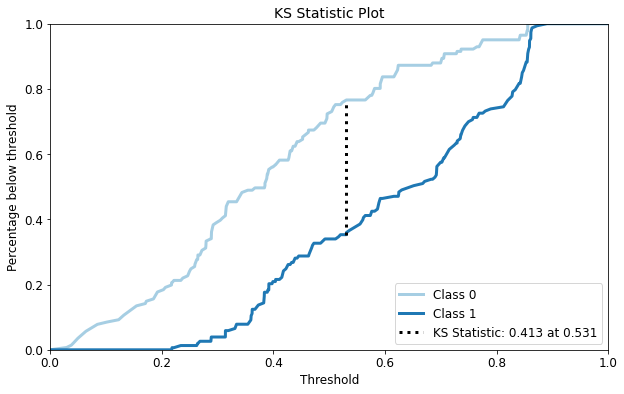

In [134]:
skplt.metrics.plot_ks_statistic(Y_test,y_probas_log,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

C:\Users\elcot\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

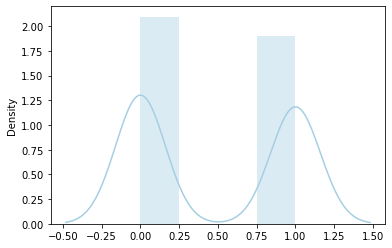

In [135]:
sns.distplot(y_pred_log)

# Support Vector Machine Model

    Support Vector Machine (SVM) is a supervised machine learning algorithm capable of performing classification, regression and even outlier detection. The linear SVM classifier works by drawing a straight line between two classes. 

In [136]:
from sklearn.svm import SVC

In [137]:
model_svc = SVC(probability=True)

In [138]:
model_svc.fit(X_train,Y_train)

SVC(probability=True)

In [139]:
y_pred_svc = model_svc.predict(X_test)
y_pred_svc

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1])

In [140]:
model_svc.score(X_test,y_pred_svc)

1.0

In [141]:
df1 = pd.DataFrame({"Actual":Y_test,"Predicted":y_pred_svc})
df1

,Actual,Predicted
582,1,1
208,0,1
554,1,1
540,1,1
477,0,1
...,...,...
66,1,0
149,0,1
634,0,0
847,1,0


In [142]:
y_probas_svc = model.predict_proba(X_test)
y_probas_svc

array([[0.15180777, 0.84819223],
       [0.14523843, 0.85476157],
       [0.37544876, 0.62455124],
       [0.42370899, 0.57629101],
       [0.14523843, 0.85476157],
       [0.75357903, 0.24642097],
       [0.72134196, 0.27865804],
       [0.18007755, 0.81992245],
       [0.5229322 , 0.4770678 ],
       [0.46913713, 0.53086287],
       [0.15759103, 0.84240897],
       [0.61095466, 0.38904534],
       [0.27218378, 0.72781622],
       [0.49183462, 0.50816538],
       [0.71091045, 0.28908955],
       [0.56111206, 0.43888794],
       [0.86796614, 0.13203386],
       [0.87728768, 0.12271232],
       [0.49553447, 0.50446553],
       [0.82775662, 0.17224338],
       [0.30805857, 0.69194143],
       [0.41867338, 0.58132662],
       [0.15397011, 0.84602989],
       [0.30773991, 0.69226009],
       [0.78246564, 0.21753436],
       [0.60809503, 0.39190497],
       [0.34852832, 0.65147168],
       [0.71133175, 0.28866825],
       [0.75021634, 0.24978366],
       [0.40861169, 0.59138831],
       [0.

In [143]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred_svc)

array([[109,  32],
       [ 63,  90]], dtype=int64)

              precision    recall  f1-score   support

           0       0.63      0.77      0.70       141
           1       0.74      0.59      0.65       153

    accuracy                           0.68       294
   macro avg       0.69      0.68      0.68       294
weighted avg       0.69      0.68      0.67       294



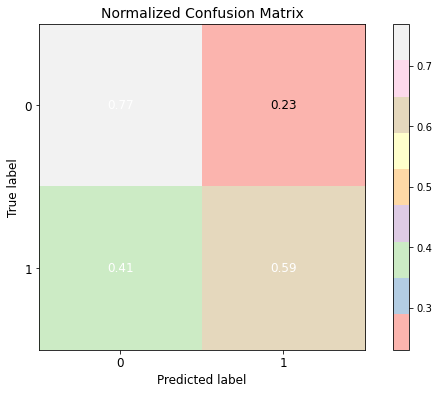

In [144]:
skplt.metrics.plot_confusion_matrix(Y_test,y_pred_svc,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(Y_test, y_pred_svc))

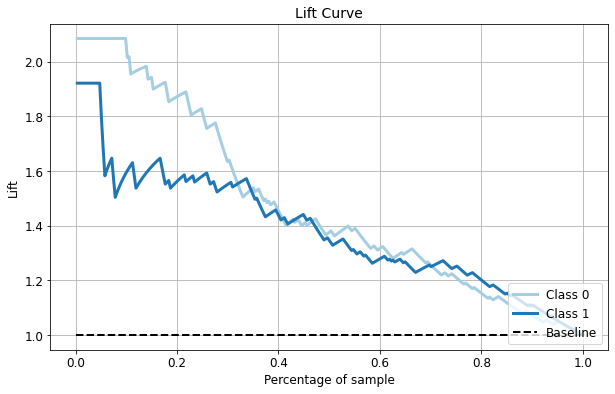

In [145]:
skplt.metrics.plot_lift_curve(Y_test,y_probas_svc,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

C:\Users\elcot\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

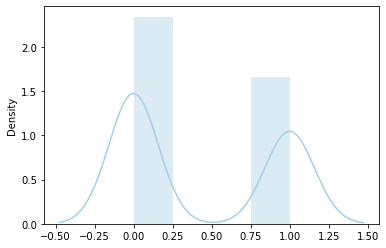

In [146]:
sns.distplot(y_pred_svc)

# DecisionTreeClassifier

    Decision Tree use to solve different kind of problems like Regression and Classification and 
    It's a Rule based kind of thing.
    Decision Tree is according to divide into two varibles and it's just making decision

In [147]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
clf = DecisionTreeClassifier()

In [149]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [150]:
y_pred_dec = clf.predict(X_test)

In [151]:
y_pred_dec

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1])

In [152]:
df1 = pd.DataFrame({"Actual":Y_test,"Predicted":y_pred_dec})
df1

,Actual,Predicted
582,1,1
208,0,0
554,1,1
540,1,1
477,0,0
...,...,...
66,1,1
149,0,0
634,0,0
847,1,1


In [153]:
y_probas_dec = model.predict_proba(X_test)

In [154]:
y_probas_dec

array([[0.15180777, 0.84819223],
       [0.14523843, 0.85476157],
       [0.37544876, 0.62455124],
       [0.42370899, 0.57629101],
       [0.14523843, 0.85476157],
       [0.75357903, 0.24642097],
       [0.72134196, 0.27865804],
       [0.18007755, 0.81992245],
       [0.5229322 , 0.4770678 ],
       [0.46913713, 0.53086287],
       [0.15759103, 0.84240897],
       [0.61095466, 0.38904534],
       [0.27218378, 0.72781622],
       [0.49183462, 0.50816538],
       [0.71091045, 0.28908955],
       [0.56111206, 0.43888794],
       [0.86796614, 0.13203386],
       [0.87728768, 0.12271232],
       [0.49553447, 0.50446553],
       [0.82775662, 0.17224338],
       [0.30805857, 0.69194143],
       [0.41867338, 0.58132662],
       [0.15397011, 0.84602989],
       [0.30773991, 0.69226009],
       [0.78246564, 0.21753436],
       [0.60809503, 0.39190497],
       [0.34852832, 0.65147168],
       [0.71133175, 0.28866825],
       [0.75021634, 0.24978366],
       [0.40861169, 0.59138831],
       [0.

In [155]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred_dec)

array([[133,   8],
       [  1, 152]], dtype=int64)

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       141
           1       0.95      0.99      0.97       153

    accuracy                           0.97       294
   macro avg       0.97      0.97      0.97       294
weighted avg       0.97      0.97      0.97       294



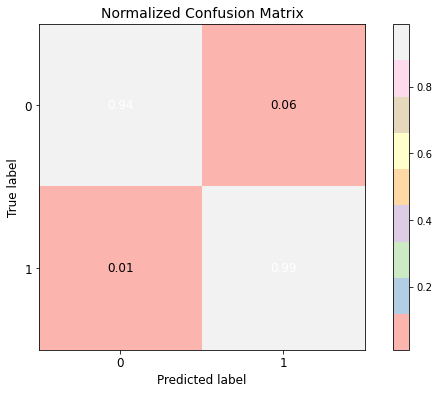

In [156]:
skplt.metrics.plot_confusion_matrix(Y_test,y_pred_dec,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(Y_test, y_pred_dec))

In [157]:
print("Accuracy = ",accuracy_score(Y_test,y_pred_dec))

Accuracy =  0.9693877551020408


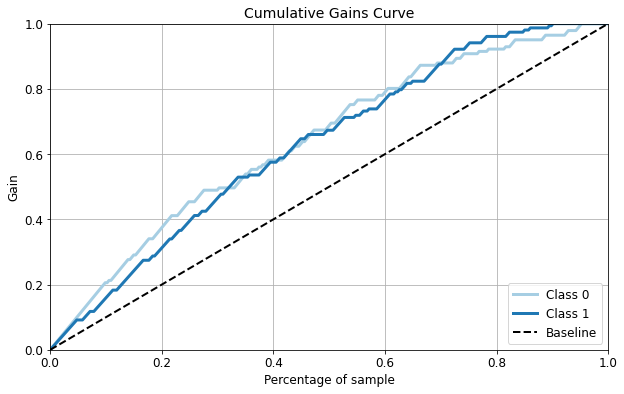

In [158]:
skplt.metrics.plot_cumulative_gain(Y_test,y_probas_dec,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

C:\Users\elcot\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

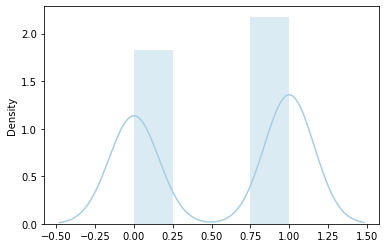

In [159]:
sns.distplot(y_pred_dec)

[Text(3491.049667143486, 4446.111111111111, 'X[57] <= 16.5\ngini = 0.498\nsamples = 686\nvalue = [367, 319]'),
 Text(2880.602855413733, 4278.333333333333, 'X[33] <= 0.5\ngini = 0.441\nsamples = 485\nvalue = [326, 159]'),
 Text(2815.109897667254, 4110.555555555556, 'X[58] <= 0.5\ngini = 0.455\nsamples = 454\nvalue = [295, 159]'),
 Text(2749.6169399207747, 3942.777777777778, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(2880.602855413733, 3942.777777777778, 'X[32] <= 0.5\ngini = 0.449\nsamples = 447\nvalue = [295, 152]'),
 Text(2486.5578235035214, 3775.0, 'X[37] <= 0.5\ngini = 0.437\nsamples = 428\nvalue = [290, 138]'),
 Text(2421.0648657570423, 3607.222222222222, 'X[58] <= 57.5\ngini = 0.429\nsamples = 421\nvalue = [290, 131]'),
 Text(1829.4536751760565, 3439.4444444444443, 'X[54] <= 22.5\ngini = 0.417\nsamples = 402\nvalue = [283, 119]'),
 Text(1170.6866197183099, 3271.666666666667, 'X[49] <= 0.5\ngini = 0.5\nsamples = 51\nvalue = [26, 25]'),
 Text(1105.193661971831, 3103.888888888

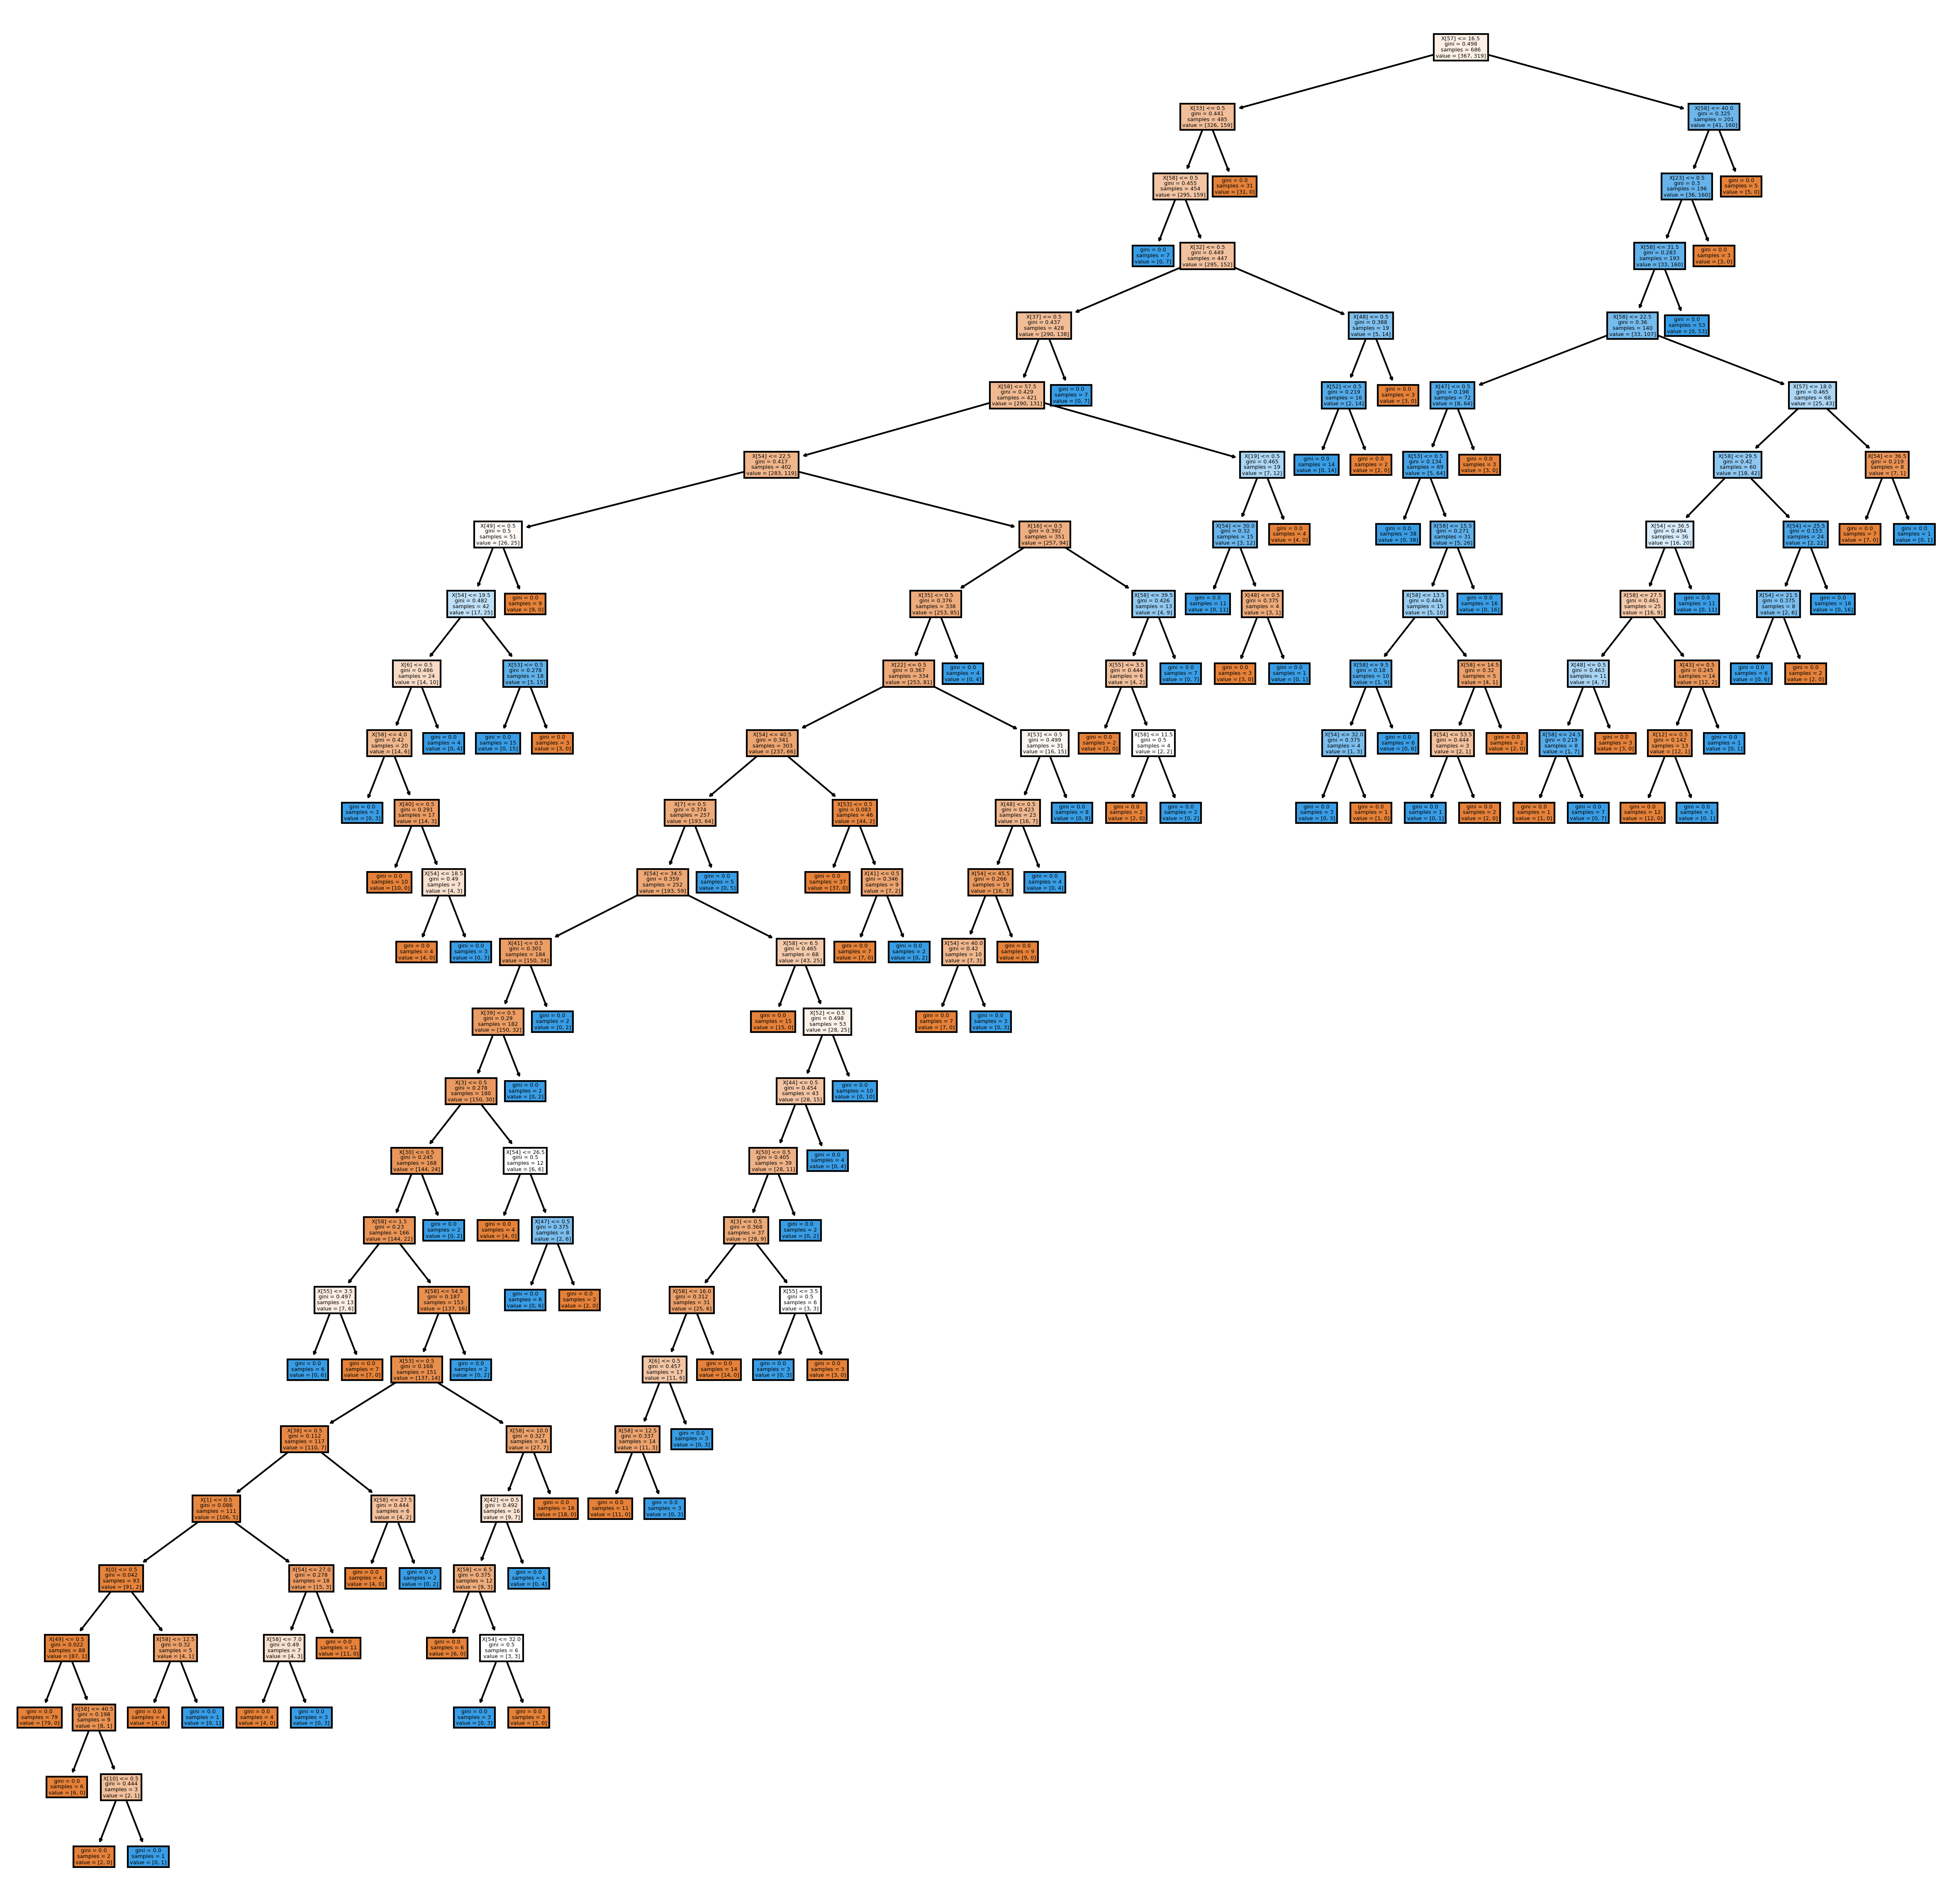

In [160]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)
tree.plot_tree(clf,filled=True)

In [161]:
text_represent = tree.export_text(clf)
text_represent

'|--- feature_57 <= 16.50\n|   |--- feature_33 <= 0.50\n|   |   |--- feature_58 <= 0.50\n|   |   |   |--- class: 1\n|   |   |--- feature_58 >  0.50\n|   |   |   |--- feature_32 <= 0.50\n|   |   |   |   |--- feature_37 <= 0.50\n|   |   |   |   |   |--- feature_58 <= 57.50\n|   |   |   |   |   |   |--- feature_54 <= 22.50\n|   |   |   |   |   |   |   |--- feature_49 <= 0.50\n|   |   |   |   |   |   |   |   |--- feature_54 <= 19.50\n|   |   |   |   |   |   |   |   |   |--- feature_6 <= 0.50\n|   |   |   |   |   |   |   |   |   |   |--- feature_58 <= 4.00\n|   |   |   |   |   |   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |   |   |   |   |   |--- feature_58 >  4.00\n|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3\n|   |   |   |   |   |   |   |   |   |--- feature_6 >  0.50\n|   |   |   |   |   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |   |   |   |--- feature_54 >  19.50\n|   |   |   |   |   |   |   |   |   |--- feature_53 <= 0.50\n|   |

In [162]:
plt.savefig('trees.png',format='png',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

# K Neighbors Classifier

    The k-Nearest-Neighbor Classifier (kNN) works directly on the learned samples, instead of creating rules compared to other classification methods

In [163]:
from sklearn.neighbors import KNeighborsClassifier
knc =KNeighborsClassifier(n_neighbors=2)
knc = clf.fit(X_train, Y_train)
print('Accuracy:', knc.score(X_test, Y_test)*100)

Accuracy: 96.93877551020408


In [164]:
y_pred_train_knc = knc.predict(X_train) 
y_pred_train_knc

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,

In [165]:
y_pred_knc = model.predict(X_test)

In [166]:
y_pred_knc

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1])

In [167]:
df1 = pd.DataFrame({"Actual":Y_test,"Predicted":y_pred_knc})
df1

,Actual,Predicted
582,1,1
208,0,1
554,1,1
540,1,1
477,0,1
...,...,...
66,1,0
149,0,1
634,0,0
847,1,0


In [168]:
y_probas_knc = model.predict_proba(X_test)

In [169]:
y_probas_knc

array([[0.15180777, 0.84819223],
       [0.14523843, 0.85476157],
       [0.37544876, 0.62455124],
       [0.42370899, 0.57629101],
       [0.14523843, 0.85476157],
       [0.75357903, 0.24642097],
       [0.72134196, 0.27865804],
       [0.18007755, 0.81992245],
       [0.5229322 , 0.4770678 ],
       [0.46913713, 0.53086287],
       [0.15759103, 0.84240897],
       [0.61095466, 0.38904534],
       [0.27218378, 0.72781622],
       [0.49183462, 0.50816538],
       [0.71091045, 0.28908955],
       [0.56111206, 0.43888794],
       [0.86796614, 0.13203386],
       [0.87728768, 0.12271232],
       [0.49553447, 0.50446553],
       [0.82775662, 0.17224338],
       [0.30805857, 0.69194143],
       [0.41867338, 0.58132662],
       [0.15397011, 0.84602989],
       [0.30773991, 0.69226009],
       [0.78246564, 0.21753436],
       [0.60809503, 0.39190497],
       [0.34852832, 0.65147168],
       [0.71133175, 0.28866825],
       [0.75021634, 0.24978366],
       [0.40861169, 0.59138831],
       [0.

In [170]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred_knc)

array([[102,  39],
       [ 52, 101]], dtype=int64)

              precision    recall  f1-score   support

           0       0.66      0.72      0.69       141
           1       0.72      0.66      0.69       153

    accuracy                           0.69       294
   macro avg       0.69      0.69      0.69       294
weighted avg       0.69      0.69      0.69       294



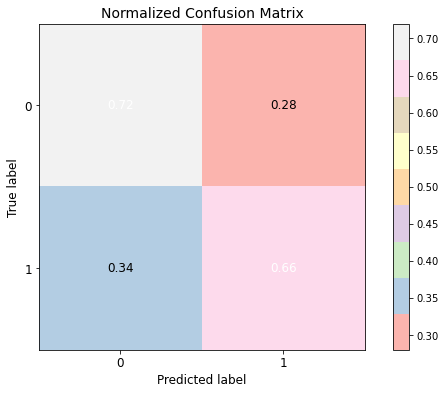

In [171]:
skplt.metrics.plot_confusion_matrix(Y_test,y_pred_knc,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(Y_test, y_pred_knc))

C:\Users\elcot\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

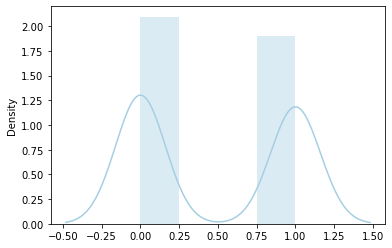

In [172]:
sns.distplot(y_pred_knc)

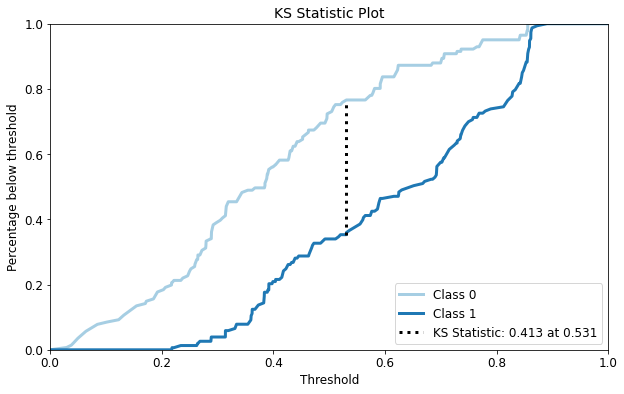

In [175]:
skplt.metrics.plot_ks_statistic(Y_test,y_probas_knc,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

So, The Highest Accuracy found in "K Neighbors Classifier" and "DecisionTreeClassifier" . 

Both Models have 96.93877551020408 accuracy